# Install Dependency

In [1]:
!pip install --quiet --upgrade tensorflow_federated
!pip install --quiet --upgrade nest_asyncio

import nest_asyncio
nest_asyncio.apply()

%load_ext tensorboard

In [2]:
import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff

np.random.seed(0)

tff.federated_computation(lambda: 'Hello, World!')()

b'Hello, World!'

In [3]:
from tensorflow import config

gpus = config.list_physical_devices('GPU')
print(gpus)
if gpus:
  try:
    for gpu in gpus:
        config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

[]


# Connect to Google drive

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
PATH_TO_DATA = "/content/gdrive/My Drive/Colab Notebooks/data/TFF-DATA"
PRAPROCESSING_DATA = "{}/Preprocessed".format(PATH_TO_DATA)
RAW_DATA = "{}/Raw Data".format(PATH_TO_DATA)

# Load data

In [6]:
from __future__ import absolute_import, division, print_function

import os
import glob
import tqdm
import numpy as np

def getUserKey():
  data = []
  for filename in glob.glob(os.path.join(FILE_USED, '*.csv')):
    file = filename.split("/")[-1]
    data.append(file)
  return data

def convertToNumpy(data):
  x = np.array(data)
  x = x.astype(np.float)
  return x

def mapValueToData(lines):
  for i in tqdm.tqdm(range(len(lines))):
      item = lines[i]
      data = item.split(",")
      x = convertToNumpy(data[:-1])
      y = int(data[-1])
      yield x, y

def readFileToArray(filename):
  x_data = []
  y_data = []
  with open(filename, "r") as fi:
    lines = fi.readlines()
    print()
    print("Load data from ", filename, "with total line ", len(lines))
    for x, y in mapValueToData(lines):
      x_data.append(x)
      y_data.append(y)
  return x_data, y_data

FILE_USED = PRAPROCESSING_DATA
X = {}
Y = {}
for filename in glob.glob(os.path.join(FILE_USED, '*.csv')):
  file = filename.split("/")[-1]
  x_train, y_train = readFileToArray(filename)
  X[file] = x_train
  Y[file] = y_train

  7%|▋         | 9943/144538 [00:00<00:02, 51519.60it/s]


Load data from  /content/gdrive/My Drive/Colab Notebooks/data/TFF-DATA/Preprocessed/mHealth_subject1.csv with total line  144538


  3%|▎         | 3924/113461 [00:00<00:02, 38581.96it/s]


Load data from  /content/gdrive/My Drive/Colab Notebooks/data/TFF-DATA/Preprocessed/mHealth_subject2.csv with total line  113461


  4%|▍         | 4632/105164 [00:00<00:02, 46316.51it/s]


Load data from  /content/gdrive/My Drive/Colab Notebooks/data/TFF-DATA/Preprocessed/mHealth_subject3.csv with total line  105164


  5%|▍         | 4936/99840 [00:00<00:01, 49357.22it/s]


Load data from  /content/gdrive/My Drive/Colab Notebooks/data/TFF-DATA/Preprocessed/mHealth_subject4.csv with total line  99840


  4%|▍         | 4514/104293 [00:00<00:02, 45135.52it/s]


Load data from  /content/gdrive/My Drive/Colab Notebooks/data/TFF-DATA/Preprocessed/mHealth_subject5.csv with total line  104293


  6%|▌         | 5016/84531 [00:00<00:01, 50154.55it/s]


Load data from  /content/gdrive/My Drive/Colab Notebooks/data/TFF-DATA/Preprocessed/mHealth_subject6.csv with total line  84531


  6%|▌         | 5200/88627 [00:00<00:01, 51991.50it/s]


Load data from  /content/gdrive/My Drive/Colab Notebooks/data/TFF-DATA/Preprocessed/mHealth_subject7.csv with total line  88627


  4%|▍         | 4728/114124 [00:00<00:02, 47279.48it/s]


Load data from  /content/gdrive/My Drive/Colab Notebooks/data/TFF-DATA/Preprocessed/mHealth_subject8.csv with total line  114124


  4%|▍         | 4619/119246 [00:00<00:02, 46185.31it/s]


Load data from  /content/gdrive/My Drive/Colab Notebooks/data/TFF-DATA/Preprocessed/mHealth_subject9.csv with total line  119246


  6%|▌         | 4606/83046 [00:00<00:01, 46054.66it/s]


Load data from  /content/gdrive/My Drive/Colab Notebooks/data/TFF-DATA/Preprocessed/mHealth_subject10.csv with total line  83046


100%|██████████| 83046/83046 [00:01<00:00, 47904.63it/s]


In [7]:
userkey = getUserKey()
user = 0 # first user
print(X[userkey[user]][:2])
print(" Total data from user '{}' is [{}]".format(userkey[user], len(X[userkey[user]])))

[array([-9.8184e+00,  9.9710e-03,  2.9563e-01,  4.1863e-03,  4.1863e-03,
        6.3077e-01,  1.0390e-01, -8.4053e-01, -6.8762e-01, -3.7000e-01,
       -3.6327e-01,  2.9963e-01, -8.6499e+00, -4.5781e+00,  1.8776e-01,
       -4.4902e-01, -1.0103e+00,  3.4483e-02, -2.3500e+00, -1.6102e+00,
       -3.0899e-02]), array([-9.8489e+00,  5.2404e-01,  3.7348e-01,  4.1863e-03,  1.6745e-02,
        6.8389e-01,  8.5343e-02, -8.3865e-01, -6.8369e-01, -1.9799e-01,
       -1.8151e-01,  5.8298e-01, -8.6275e+00, -4.3198e+00,  2.3595e-02,
       -4.4902e-01, -1.0103e+00,  3.4483e-02, -2.1632e+00, -8.8254e-01,
        3.2657e-01])]
 Total data from user 'mHealth_subject1.csv' is [144538]


# Split Data

In [8]:
from sklearn.model_selection import train_test_split


X_TRAIN = {}
Y_TRAIN = {}
X_TEST = {}
Y_TEST = {}

test_size = 0.2

userkey = getUserKey()
for user in userkey:
  x_user = X[user]
  y_user = Y[user]
  x_train_user, x_test_user, y_train_user, y_test_user = train_test_split(x_user, y_user, test_size=test_size, random_state=2019)
  X_TRAIN[user] = x_train_user
  Y_TRAIN[user] = y_train_user
  X_TEST[user] = x_test_user
  Y_TEST[user] = y_test_user
  # print(user, len(y_user), y_user[0], x_user[0], len(x_train_user), len(x_test_user))
  print("'{}' {} {}".format(file, len(x_train_user), len(x_test_user)))

'mHealth_subject10.csv' 115630 28908
'mHealth_subject10.csv' 90768 22693
'mHealth_subject10.csv' 84131 21033
'mHealth_subject10.csv' 79872 19968
'mHealth_subject10.csv' 83434 20859
'mHealth_subject10.csv' 67624 16907
'mHealth_subject10.csv' 70901 17726
'mHealth_subject10.csv' 91299 22825
'mHealth_subject10.csv' 95396 23850
'mHealth_subject10.csv' 66436 16610


In [9]:

userkey = getUserKey()
x_train_all = X_TRAIN[userkey[0]]
y_train_all = Y_TRAIN[userkey[0]]
x_test_all = X_TEST[userkey[0]]
y_test_all = Y_TEST[userkey[0]]
for user in userkey[1:]:
  x_train_all = np.concatenate((x_train_all, X_TRAIN[user]))
  y_train_all = np.concatenate((y_train_all, Y_TRAIN[user]))
  x_test_all = np.concatenate((x_test_all, X_TEST[user]))
  y_test_all = np.concatenate((y_test_all, Y_TEST[user]))
print("Total data -> x_train_all:{} y_train_all:{} x_test_all:{} y_test_all:{}".format(len(x_train_all), len(y_train_all), len(x_test_all), len(y_test_all)))

Total data -> x_train_all:845491 y_train_all:845491 x_test_all:211379 y_test_all:211379


# Mapping to Training Format, TFF

In [10]:
import collections
from tensorflow_federated import python as tff

userkey = getUserKey()
client_train_dataset = collections.OrderedDict()
for user in userkey:
  data = collections.OrderedDict((('label', Y_TRAIN[user]), ('sensor_data', X_TRAIN[user])))
  client_train_dataset[user] = data

In [11]:
userkey = getUserKey()
client_test_dataset = collections.OrderedDict()
for user in userkey:
  data = collections.OrderedDict((('label', Y_TEST[user]), ('sensor_data', X_TEST[user])))
  client_test_dataset[user] = data

In [12]:
train_dataset = tff.simulation.FromTensorSlicesClientData(client_train_dataset)
train_dataset

In [13]:
test_dataset = tff.simulation.FromTensorSlicesClientData(client_test_dataset)
test_dataset

In [14]:
len(train_dataset.client_ids)

10

In [15]:
train_dataset.client_ids

['mHealth_subject1.csv',
 'mHealth_subject2.csv',
 'mHealth_subject3.csv',
 'mHealth_subject4.csv',
 'mHealth_subject5.csv',
 'mHealth_subject6.csv',
 'mHealth_subject7.csv',
 'mHealth_subject8.csv',
 'mHealth_subject9.csv',
 'mHealth_subject10.csv']

In [16]:
train_dataset.element_type_structure

OrderedDict([('label', TensorSpec(shape=(), dtype=tf.int32, name=None)),
             ('sensor_data',
              TensorSpec(shape=(21,), dtype=tf.float64, name=None))])

In [17]:
example_dataset = train_dataset.create_tf_dataset_for_client(
    train_dataset.client_ids[0])

example_element = next(iter(example_dataset))

example_element['label'].numpy()

0

In [18]:
example_element['sensor_data'].numpy()

array([-12.206  ,   1.6892 ,  -5.3638 ,  -0.13815,  -0.31397,  -7.1242 ,
        -0.41558,  -0.90807,  -0.37721,  67.614  , -46.364  ,  -3.486  ,
        -4.0507 , -15.319  ,   3.1299 ,  -0.77647,  -0.61191,   0.49784,
        -7.8533 , -13.335  , -34.681  ])

# Exploring Data

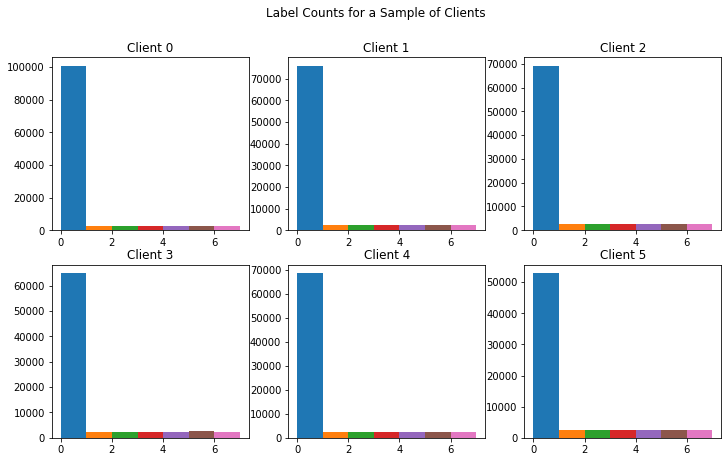

In [34]:
# from matplotlib import pyplot as plt

# # Number of examples per layer for a sample of clients
# f = plt.figure(figsize=(12, 7))
# f.suptitle('Label Counts for a Sample of Clients')
# for i in range(6):
#   client_dataset = train_dataset.create_tf_dataset_for_client(
#       train_dataset.client_ids[i])
#   plot_data = collections.defaultdict(list)
#   for example in client_dataset:
#     # Append counts individually per label to make plots
#     # more colorful instead of one color per plot.
#     label = example['label'].numpy()
#     plot_data[label].append(label)
#   plt.subplot(2, 3, i+1)
#   plt.title('Client {}'.format(i))
#   for j in range(10):
#     plt.hist(
#         plot_data[j],
#         density=False,
#         bins=[0, 1, 2, 3, 4, 5, 6, 7])

# Prepocessing Input Data

In [20]:
NUM_CLIENTS = 8
NUM_EPOCHS = 5
BATCH_SIZE = 20
SHUFFLE_BUFFER = 100
PREFETCH_BUFFER = 10

def preprocess(dataset):

  def batch_format_fn(element):
    """Flatten a batch `sensor_data` and return the features as an `OrderedDict`."""
    return collections.OrderedDict(
        x=tf.reshape(element['sensor_data'], [-1, 21]),
        y=tf.reshape(element['label'], [-1, 1]))

  return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER).batch(
      BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)

In [21]:
import tensorflow as tf

preprocessed_example_dataset = preprocess(example_dataset)

sample_batch = tf.nest.map_structure(lambda x: x.numpy(),
                                     next(iter(preprocessed_example_dataset)))

sample_batch

OrderedDict([('x',
              array([[-1.5568e+01, -3.7494e-01,  1.7241e+00, -3.5583e-01, -8.7912e-02,
                       5.3496e+00, -5.2876e-01, -7.0919e-01, -6.2083e-01, -6.5222e+01,
                      -9.6229e+01,  4.4114e+01, -6.4065e+00, -1.1639e+01,  2.0951e+00,
                       2.9020e-01, -9.3224e-01, -5.4095e-01,  6.1043e+00, -3.5893e+01,
                      -6.2335e+01],
                     [-6.3561e+00,  1.6410e+00, -6.8207e+00,  2.5118e-01,  6.2794e-02,
                       6.1740e-01, -3.7291e-01, -5.8912e-01,  6.0904e-01,  1.9805e-01,
                       3.6499e-01, -5.8481e-01, -7.0132e+00, -1.2517e-01,  6.4833e+00,
                      -1.5333e+00,  1.1992e+00,  5.0000e-01,  3.6266e-01,  3.5939e-01,
                       3.6593e-03],
                     [-8.8891e+00,  1.0543e-02, -2.8727e+00, -5.8608e-02, -1.3815e-01,
                       2.1152e-01, -1.3173e-01, -6.7730e-01,  6.7976e-01, -4.5573e+00,
                       4.4492e+00,  1.4

In [22]:
def make_federated_data(client_data, client_ids):
  return [
      preprocess(client_data.create_tf_dataset_for_client(x))
      for x in client_ids
  ]

In [23]:
sample_clients = train_dataset.client_ids[0:NUM_CLIENTS]

federated_train_data = make_federated_data(train_dataset, sample_clients)

print('Number of client datasets: {l}'.format(l=len(federated_train_data)))
print('First dataset: {d}'.format(d=federated_train_data[0]))

Number of client datasets: 8
First dataset: <PrefetchDataset shapes: OrderedDict([(x, (None, 21)), (y, (None, 1))]), types: OrderedDict([(x, tf.float64), (y, tf.int32)])>


In [24]:
sample_clients = train_dataset.client_ids[0:NUM_CLIENTS]

federated_test_data = make_federated_data(train_dataset, sample_clients)

print('Number of client datasets: {l}'.format(l=len(federated_train_data)))
print('First dataset: {d}'.format(d=federated_train_data[0]))

Number of client datasets: 8
First dataset: <PrefetchDataset shapes: OrderedDict([(x, (None, 21)), (y, (None, 1))]), types: OrderedDict([(x, tf.float64), (y, tf.int32)])>


# Create Model

In [25]:
def create_keras_model():
  return tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(21,)),
      tf.keras.layers.Dense(10, kernel_initializer='zeros'),
      tf.keras.layers.Softmax(),
  ])

In [26]:
def model_fn():
  # We _must_ create a new model here, and _not_ capture it from an external
  # scope. TFF will call this within different graph contexts.
  keras_model = create_keras_model()
  return tff.learning.from_keras_model(
      keras_model,
      input_spec=preprocessed_example_dataset.element_spec,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [27]:
iterative_process = tff.learning.build_federated_averaging_process(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.02),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0))

In [28]:
str(iterative_process.initialize.type_signature)

'( -> <model=<trainable=<float32[21,10],float32[10]>,non_trainable=<>>,optimizer_state=<int64>,delta_aggregate_state=<value_sum_process=<>,weight_sum_process=<>>,model_broadcast_state=<>>@SERVER)'

In [29]:
state = iterative_process.initialize()

In [30]:
# state, metrics = iterative_process.next(state, federated_train_data)
# print('round  1, metrics={}'.format(metrics))

In [31]:
# NUM_ROUNDS = 50
# for round_num in range(2, NUM_ROUNDS):
#   state, metrics = iterative_process.next(state, federated_train_data)
#   print('round {:2d}, metrics={}'.format(round_num, metrics))

In [32]:
# NUM_ROUNDS = 100
# for round_num in range(50, NUM_ROUNDS):
#   state, metrics = iterative_process.next(state, federated_train_data)
#   print('round {:2d}, metrics={}'.format(round_num, metrics))

In [33]:
tff_train_acc = []
tff_val_acc = []
tff_train_loss = []
tff_val_loss = []

NUM_ROUNDS = 20

eval_model = None
for round_num in range(1, NUM_ROUNDS+1):
    state, tff_metrics = iterative_process.next(state, federated_train_data)
    
    eval_model = model_fn
    evaluation = tff.learning.build_federated_evaluation(eval_model)
    test_metrics = evaluation(state.model, federated_test_data)

    print('round {:2d}, metrics={}'.format(round_num, tff_metrics))
    print(f"Eval loss : {test_metrics['loss']} and Eval accuracy : {test_metrics['sparse_categorical_accuracy']}")
    # print(tff_metrics)
    # print(test_metrics)
    tff_train_acc.append(float(tff_metrics['train']['sparse_categorical_accuracy']))
    tff_val_acc.append(test_metrics['sparse_categorical_accuracy'])
    tff_train_loss.append(float(tff_metrics['train']['loss']))
    tff_val_loss.append(test_metrics['loss'])

round  1, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('value_sum_process', ()), ('weight_sum_process', ())])), ('train', OrderedDict([('sparse_categorical_accuracy', 0.76195705), ('loss', 2.4642746)]))])
Eval loss : 2.6734390258789062 and Eval accuracy : 0.7615887522697449
round  2, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('value_sum_process', ()), ('weight_sum_process', ())])), ('train', OrderedDict([('sparse_categorical_accuracy', 0.7697308), ('loss', 2.338925)]))])
Eval loss : 2.492234468460083 and Eval accuracy : 0.7871789932250977
round  3, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('value_sum_process', ()), ('weight_sum_process', ())])), ('train', OrderedDict([('sparse_categorical_accuracy', 0.7731957), ('loss', 2.284483)]))])
Eval loss : 2.3966786861419678 and Eval accuracy : 0.7837328314781189
round  4, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('value_sum_process', ()),

In [51]:
# this_dir = Path.cwd()
# model_dir = this_dir / "saved_models" / experiment_name / method

# eval_model().saved_models(model_dir / (experiment_name + ".h5"))

In [35]:
metric_collection = {"sparse_categorical_accuracy": tff_train_acc,
                     "val_sparse_categorical_accuracy": tff_val_acc,
                     "loss": tff_train_loss,
                     "val_loss": tff_val_loss}

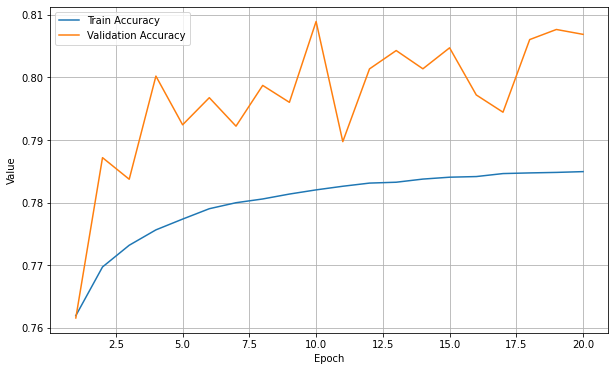

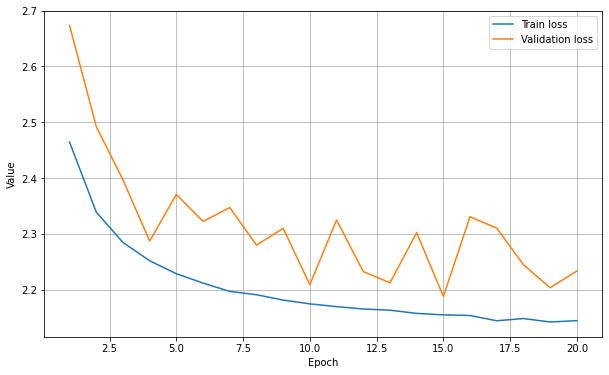

In [37]:
from matplotlib import pyplot as plt

def plot_graph(X, y, format = '-', label=''):
    plt.plot(X, y, format, label=label)
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.grid(True)

fig = plt.figure(figsize=(10, 6))
plot_graph(list(range(1, 21)), tff_train_acc, label='Train Accuracy')
plot_graph(list(range(1, 21)), tff_val_acc, label='Validation Accuracy')
plt.legend()
plt.savefig("federated_model_Accuracy.png")

plt.figure(figsize=(10, 6))
plot_graph(list(range(1, 21)), tff_train_loss, label='Train loss')
plot_graph(list(range(1, 21)), tff_val_loss, label='Validation loss')
plt.legend()
plt.savefig("federated_model_loss.png")

In [41]:
# saving metric values to text file
from pathlib import Path

experiment_name = "sensor"
method = "tff_training"

this_dir = Path.cwd()
model_dir = this_dir / "saved_models" / experiment_name / method
output_dir = this_dir / "results" / experiment_name / method

if not model_dir.exists():
    model_dir.mkdir(parents=True)

if not output_dir.exists():
    output_dir.mkdir(parents=True)
    
txt_file_path = output_dir / (experiment_name + ".txt")
with open(txt_file_path.as_posix(), "w") as handle:
    content = []
    for key, val in metric_collection.items():
        line_content = key
        val = [str(k) for k in val]
        line_content = line_content + " " + " ".join(val)
        content.append(line_content)
    handle.write("\n".join(content))

In [38]:
# tff_metrics

## Refference
1. https://www.tensorflow.org/federated/tutorials/federated_learning_for_image_classification
1. https://colab.research.google.com/github/tensorflow/federated/blob/master/docs/tutorials/federated_learning_for_image_classification.ipynb#scrollTo=qrJkQuCRJP9C
1. https://github.com/CS-savvy/experiment_with_tf_federated/blob/master/train_tff.py
1. https://stackoverflow.com/questions/54316779/change-size-of-train-and-test-set-from-mnist-dataset
1. https://www.tensorflow.org/federated/api_docs/python/tff/learning/build_federated_averaging_process
1. https://stackoverflow.com/questions/58004272/is-there-a-reasonable-way-to-create-tff-clients-datat-sets
1. https://stackoverflow.com/questions/54316779/change-size-of-train-and-test-set-from-mnist-dataset
